In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 22.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [ ]:
import zipfile

zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content/')
zip_data.close()


# Importing Essential Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
import cv2

array([[[61, 64, 62],
        [61, 64, 62],
        [60, 63, 61],
        ...,
        [56, 66, 73],
        [55, 67, 73],
        [55, 67, 73]],

       [[58, 61, 59],
        [57, 60, 58],
        [57, 60, 58],
        ...,
        [56, 66, 73],
        [55, 67, 73],
        [55, 67, 73]],

       [[55, 58, 56],
        [54, 57, 55],
        [55, 58, 56],
        ...,
        [56, 66, 73],
        [55, 67, 73],
        [55, 67, 73]],

       ...,

       [[44, 52, 59],
        [42, 52, 59],
        [43, 53, 60],
        ...,
        [15, 18, 23],
        [16, 19, 24],
        [17, 20, 25]],

       [[44, 52, 59],
        [42, 52, 59],
        [43, 53, 60],
        ...,
        [16, 19, 24],
        [16, 19, 24],
        [17, 20, 25]],

       [[44, 52, 59],
        [42, 52, 59],
        [43, 53, 60],
        ...,
        [16, 19, 24],
        [17, 20, 25],
        [18, 21, 26]]], dtype=uint8)
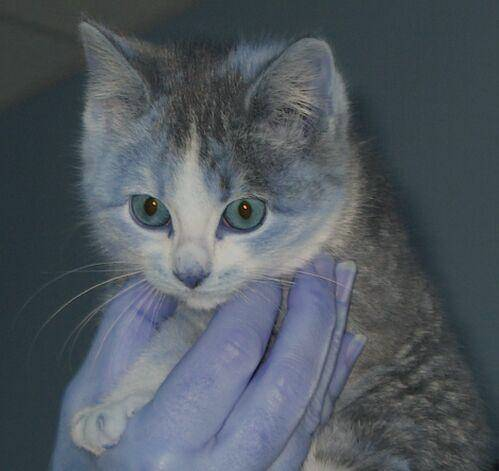

In [ ]:
img = cv2.imread('/content/train/cats/cat.10002.jpg')
img

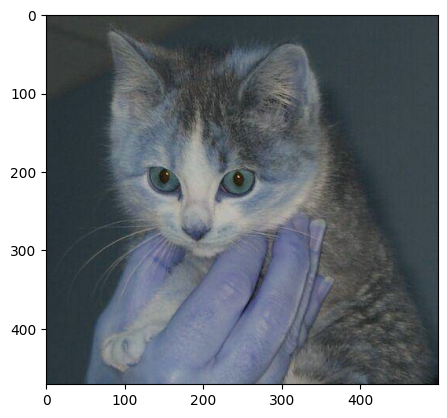

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(471, 499, 3)

# Dataset Generator

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(

                  directory = '/content/train',
                  labels='inferred',
                  label_mode='int',
                  batch_size=32,
                  image_size=(256, 256),
              )

test_ds = tf.keras.utils.image_dataset_from_directory(

                  directory = '/content/test',
                  labels='inferred',
                  label_mode='int',
                  batch_size=32,
                  image_size=(256, 256),
              )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
print(f'Number of batches: {20000//32}')

Number of batches: 625


In [ ]:
def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label

In [ ]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

In [ ]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#Create CNN Architecture or Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(train_ds, validation_data = test_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 7.6118 - accuracy: 0.5003 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 70s 110ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 57s 90ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 58s 91ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accura

##Training and Validation Accuracy Graph

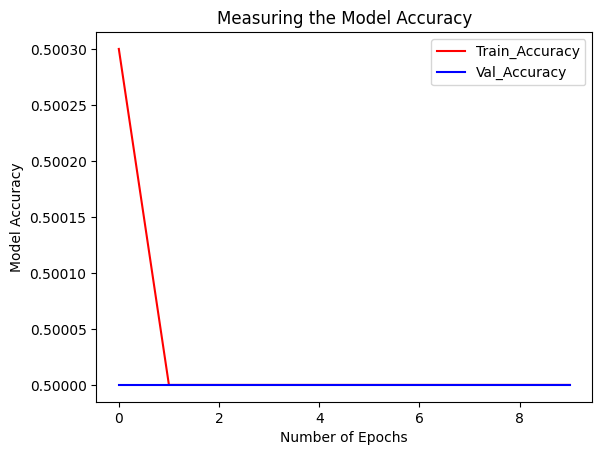

In [ ]:
plt.plot(history.history['accuracy'],color='r',label='Train_Accuracy')
plt.plot(history.history['val_accuracy'],color='b',label='Val_Accuracy')
plt.title('Measuring the Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

##Training and Validation Loss

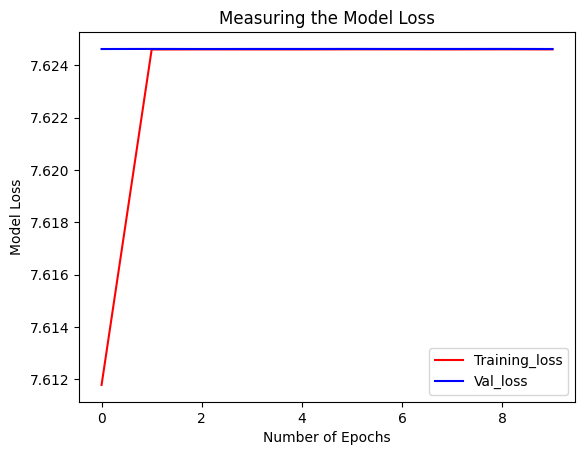

In [ ]:
plt.plot(history.history['loss'],color='r',label='Training_loss')
plt.plot(history.history['val_loss'],color='b',label='Val_loss')
plt.title('Measuring the Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Loss')
plt.legend()
plt.show()

##Ways to improve model performance and prevent overfitting

- Add more data
- Data augmentation
- L1 and L2 regularization
- Batch normalization
- Dropout Layer

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(train_ds, validation_data = test_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 70s 105ms/step - loss: 1.0124 - accuracy: 0.6083 - val_loss: 0.5735 - val_accuracy: 0.7142
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5455 - accuracy: 0.7233 - val_loss: 0.5192 - val_accuracy: 0.7386
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4972 - accuracy: 0.7645 - val_loss: 0.4615 - val_accuracy: 0.7788
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4085 - accuracy: 0.8143 - val_loss: 0.4892 - val_accuracy: 0.7708
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3400 - accuracy: 0.8507 - val_loss: 0.4471 - val_accuracy: 0.8070
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2575 - accuracy: 0.8902 - val_loss: 0.5804 - val_accuracy: 0.8150
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1820 - accuracy: 0.9290 - val_loss: 0.6330 - val_ac

##Training and Validation Accuracy Graph

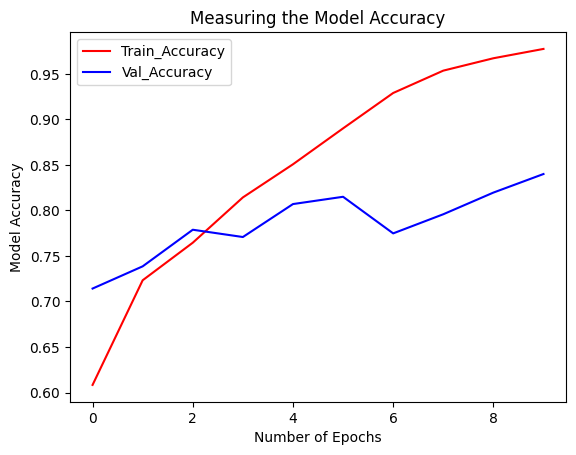

In [ ]:
plt.plot(history.history['accuracy'],color='r',label='Train_Accuracy')
plt.plot(history.history['val_accuracy'],color='b',label='Val_Accuracy')
plt.title('Measuring the Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

##Training and Validation Loss

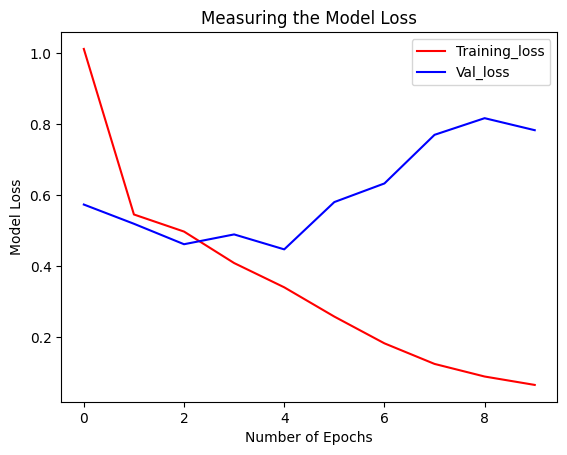

In [ ]:
plt.plot(history.history['loss'],color='r',label='Training_loss')
plt.plot(history.history['val_loss'],color='b',label='Val_loss')
plt.title('Measuring the Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Loss')
plt.legend()
plt.show()

##Testing the Model

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10285.jpg')

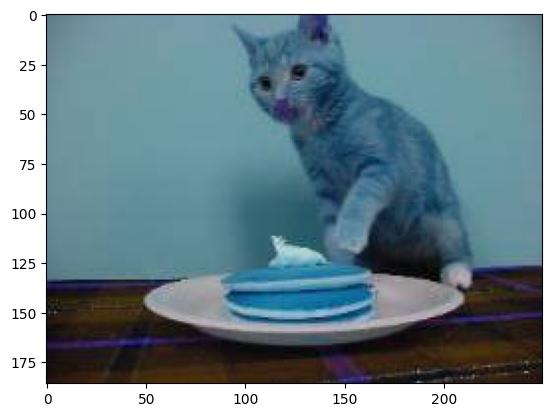

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(186, 250, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

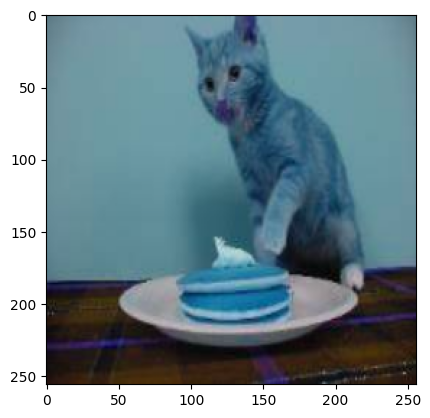

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input = test_img.reshape(1, 256, 256, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [ ]:
model.predict(test_input)[0]

1/1 [==============================] - 0s 18ms/step


array([0.], dtype=float32)

In [ ]:
model.predict(test_input)[0][0]

1/1 [==============================] - 0s 18ms/step


0.0

In [ ]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 0.5:
  print('This is a Cat')
else:
  print('This is a Dog')

1/1 [==============================] - 0s 31ms/step
Output is: 0.0 

This is a Cat
